In [1]:
import iris
import iris.quickplot as qplt
import numpy as np
import matplotlib.pyplot as plt
iris.FUTURE.date_microseconds = True
iris.FUTURE.save_split_attrs = True

In [2]:
# change to your suite-id to pick up the required file
runid='du516'
datafile='/home/vagrant/cylc-run/u-'+runid+'/runN/work/1/atmos/atmosa.pl19810901_00'

In [3]:
# constraint on time to get 2nd radiation timestep
tconstr=iris.Constraint(time=lambda cell: cell.point.hour == 2)

In [4]:
# load all TOA components
isw=iris.load_cube(datafile,[iris.AttributeConstraint(STASH='m01s01i207') & tconstr])
osw=iris.load_cube(datafile,[iris.AttributeConstraint(STASH='m01s01i208') & tconstr])
olw=iris.load_cube(datafile,[iris.AttributeConstraint(STASH='m01s02i205') & tconstr])

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/fileformats/rules.py:371: IrisUserWarning: Unable to create instance of HybridHeightFactory. The source data contains no field(s) for 'orography'.
  warnings.warn(


In [5]:
# make cube to store net downward TOA flux
toa=isw.copy()
toa.data=np.zeros(toa.data.shape)

# calculate TOA flux
toa.data=isw.data - (osw.data + olw.data)

toa.rename('toa_net_downward_radiative_flux')

/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/vagrant/.conda/envs/ukca/lib/python3.12/site-packages/iris/coords.py:1980: IrisGuessBoundsWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


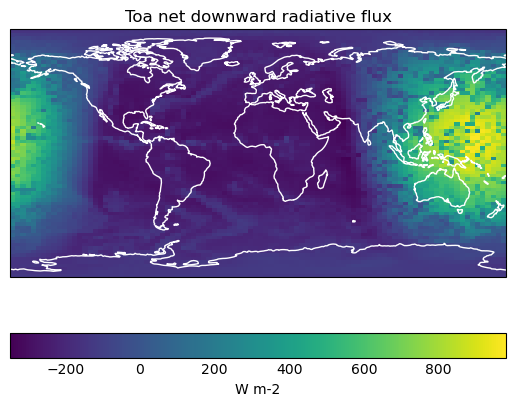

In [6]:
qplt.pcolormesh(toa)
plt.gca().coastlines(color='w')

In [7]:
# output to netCDF
iris.save(toa,'/home/vagrant/iris_Task064_TOA.nc',netcdf_format='NETCDF4')